In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import common as cm

# A-star algorithm

This exercise consists of only one parts. Finish this part to get a mark of 5.0.

The task of the A-star algorithm is to find the shortest path between two nodes in the graph. This algorithm is often used to find the shortest path on a 2d map. In this case, nodes are different possible positions (fields), and edges from node in the graph lead to adjacent fields.

There are various possible moves depending on different neighbourhood models and the different cost values for each move.

In [2]:
possible_moves = [(i-1,j-1) for i in range(3) for j in range(3) if i !=1 or j !=1]
#possible_moves = [(0,1),(1,0),(0,-1),(-1,0)]
#possible_moves = [(1,2),(2,1),(1,-2),(-2,1),(-1,2),(2,-1),(-1,-2),(-2,-1)]

In [3]:
possible_moves_costs = [math.sqrt(abs(i)+abs(j)) for i,j in possible_moves]
#possible_moves_costs = [0.5+(abs(i)+abs(j))/2 for i,j in possible_moves]

In this task, we will use the node class, which will store references to the node from which we came (parent) positions, and the g (actual cost from the beginning of the path to this node) and f (estimated path length passing through this node).

1.1) Complete the function estimatePathLenght calculating the value of f, based on the actual distance of the node from the source g and the Euclidean distance to the target h.

In [4]:
class Node():
    def __init__(self, parent, position):
        self.parent = parent
        self.position = position       
        self.g = 0
        self.f = 0
        self.step = 0 #It says in which step node was created.
        
    def __eq__(self, other):
        return self.position == other.position
    
    def setG(self, cost):
        self.g = self.parent.g + cost        
        
    def GetPath(self):
        if self.parent is None:
            return [self.position]
        else:
            return self.parent.GetPath() + [self.position]
        
    def estimatePathLenght(self, target):      
        return self.g + sqrt((self.position[0]-target.position[0])**2+(self.position[1]-target.position[1])**2)


Then there is a function that checks whether a given position is correct, not out of range, and whether it is an obstacle.

In [5]:
def validPosition(position, terrain):
    if position[0]<0 or position[1]<0 or position[0]>=terrain.shape[0] or position[1]>=terrain.shape[1]:
        return False
    if  terrain[position] == 1:
        return False
    return True
        

1.2) Complete the function calculating the shortest path using the A * algorithm. 

1) To do this, find all neighbours positions for the considered node, then check that the position is correct. <br>
2) If so, create a new node (child/neighbour) which parent is the node being considered.<br>
3) Calculate the child's g value using the cost of transition from node to child.<br>
4) Check if the child node has already been visited (closed set).<br>
5) If not then check if there is a node on the open set (unvisited) with the same position but a smaller g-value (it's closer to the source).<br>
6) If not, calculate the estimated distance from source to destination through the child and add this node to the list to check.<br>
7) After generating all adjacent nodes, sort the open set list so that the next considered node has the smallest f value.<br>

The algorithm returns a node whose position is the same as the target position and which stores the entire path through the parent field.

In [6]:
def A_star(terrain, position_start, position_target, possible_moves, possible_moves_costs):
    closed_set = []
    open_set = []
    root = Node(None,position_start)
    target = Node(None,position_target)
    open_set.append(root)
    step = 0
    while(len(open_set)>0):
        node = open_set.pop()
        closed_set.append(node)
        step+=1
        node.step = step
        if node == target:
            return node,closed_set
        #TODO
     

1.3) Find the shortest path for 2 sample data.

In [7]:
position_start, position_target, terrain  = cm.getSmallExample()

Show terrain<br>
1 means wall, and 0 empty fields.

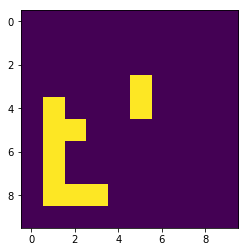

In [8]:
plt.imshow(terrain)

Run A star algorithm

In [9]:
path,closed_set = A_star(terrain, position_start, position_target, possible_moves, possible_moves_costs)

TypeError: cannot unpack non-iterable NoneType object

Plot path

In [ ]:
cm.plotPath(terrain, path)

Plot closed_set where colors indicate the number of the last iteration in which the node was checked.

In [ ]:
cm.plotSteps(terrain, closed_set)

In [ ]:
position_start, position_target, terrain  = cm.getBigExample()

In [ ]:
path,closed_set = A_star(terrain, position_start, position_target, possible_moves, possible_moves_costs)

In [ ]:
cm.plotPath(terrain, path)

In [ ]:
cm.plotSteps(terrain,closed_set)